## Общие методы для обработки данных
В данном разделе будут находится общие методы.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# читаем данные и создаём таблицу
def data_loader(path: str):
    return pd.read_csv(path)

# преобразуем данные так, как нам необходимо
def data_type_and_date_transform(data: pd.DataFrame) ->pd.DataFrame:
    data = data.replace(",", "", regex=True)
    data.Date = pd.to_datetime((data.Date - 25200) * 1e9 ) # Почему-то данные смещены на 7 часов относительно торгов(возможно, и не на 7, но при данном смещении одна торговая сессия укладывается в дневные промежутки)
    data = data.sort_values(by=["Date"])
    data.set_index('Date')
    data.Close = data.Close.astype(float)
    data.High = data.High.astype(float)
    data.Low = data.Low.astype(float)
    data.Open = data.Open.astype(float)
    return data

# Обрезает данные по дате. 
# Важно, чтобы даты в датафрейме были в том же формате что и начальная и конечная дата
def cut_by_date(data: pd.DataFrame, begin_date: str, end_date: str) -> pd.DataFrame:
     result = data[(data['Date'] > begin_date) & (data['Date'] < end_date)]
     result.index = data.index[:len(result)]
     return result

In [35]:
# Считываем данные
general_data = data_loader("raw-NASDAQ.txt")
general_data['Date'] = general_data['Date'].astype(str)
general_data['Time'] = general_data['Time'].astype(str)
general_data['Date'] = pd.to_datetime(general_data['Date'], format='%Y%m%d')
general_data['Time'] = pd.to_datetime(general_data['Time'], unit='s')
general_data['Date'] = general_data['Date'] + pd.to_timedelta(general_data['Time'].dt.strftime('%H:%M:%S'))

In [36]:
general_data = general_data.sort_values(by=["Date"])
if "Price" in general_data.columns: 
    general_data.rename(columns={"Price": "Close"}, inplace = True)
general_data.High = general_data.High
general_data.Low = general_data.Low
general_data.Open = general_data.Open
if "Vol" in general_data.columns: 
    ata = general_data.drop("Vol", axis = 1)
if "Time" in general_data.columns:
    general_data = general_data.drop("Time", axis = 1)

In [37]:
general_data.head(20)

,Ticker,Per,Date,Open,High,Low,Close,Vol
0,NQ-100-FUT,1,2010-01-01 00:01:40,186025.0,186500.0,185950.0,186500.0,3263
1,NQ-100-FUT,1,2010-01-01 00:03:20,186500.0,186500.0,186375.0,186450.0,2080
2,NQ-100-FUT,1,2010-01-01 00:05:00,186425.0,186500.0,186400.0,186425.0,1336
3,NQ-100-FUT,1,2010-01-01 00:06:40,186425.0,186450.0,186325.0,186425.0,1109
4,NQ-100-FUT,1,2010-01-01 00:08:20,186450.0,186450.0,186425.0,186425.0,136
5,NQ-100-FUT,1,2010-01-01 00:10:00,186450.0,186450.0,186425.0,186450.0,181
6,NQ-100-FUT,1,2010-01-01 00:11:40,186425.0,186450.0,186375.0,186425.0,778
7,NQ-100-FUT,1,2010-01-01 00:13:20,186400.0,186450.0,186400.0,186425.0,429
8,NQ-100-FUT,1,2010-01-01 00:15:00,186450.0,186450.0,186425.0,186425.0,69
9,NQ-100-FUT,1,2010-01-01 00:16:40,186450.0,186475.0,186425.0,186450.0,522


In [38]:
# Производим обрезку данных 
special_data = cut_by_date(general_data, "2010-01-01", "2014-01-01")

In [39]:
# Проверяем получилось ли сделать обрезку
special_data

,Ticker,Per,Date,Open,High,Low,Close,Vol
0,NQ-100-FUT,1,2010-01-01 00:01:40,186025.0,186500.0,185950.0,186500.0,3263
1,NQ-100-FUT,1,2010-01-01 00:03:20,186500.0,186500.0,186375.0,186450.0,2080
2,NQ-100-FUT,1,2010-01-01 00:05:00,186425.0,186500.0,186400.0,186425.0,1336
3,NQ-100-FUT,1,2010-01-01 00:06:40,186425.0,186450.0,186325.0,186425.0,1109
4,NQ-100-FUT,1,2010-01-01 00:08:20,186450.0,186450.0,186425.0,186425.0,136
...,...,...,...,...,...,...,...,...
1239859,NQ-100-FUT,1,2013-12-31 23:50:00,3571.0,3571.0,3571.0,3571.0,0
1239860,NQ-100-FUT,1,2013-12-31 23:51:40,3571.0,3571.0,3571.0,3571.0,0
1239861,NQ-100-FUT,1,2013-12-31 23:55:00,3571.0,3571.0,3571.0,3571.0,0
1239862,NQ-100-FUT,1,2013-12-31 23:56:40,3571.0,3571.0,3571.0,3571.0,0


In [40]:
special_data['new_index'] = special_data.Close
special_data['new_date'] = special_data.Close
special_data.head()

C:\Users\Skiv2\AppData\Local\Temp\ipykernel_33436\85445124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_data['new_index'] = special_data.Close
C:\Users\Skiv2\AppData\Local\Temp\ipykernel_33436\85445124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_data['new_date'] = special_data.Close


,Ticker,Per,Date,Open,High,Low,Close,Vol,new_index,new_date
0,NQ-100-FUT,1,2010-01-01 00:01:40,186025.0,186500.0,185950.0,186500.0,3263,186500.0,186500.0
1,NQ-100-FUT,1,2010-01-01 00:03:20,186500.0,186500.0,186375.0,186450.0,2080,186450.0,186450.0
2,NQ-100-FUT,1,2010-01-01 00:05:00,186425.0,186500.0,186400.0,186425.0,1336,186425.0,186425.0
3,NQ-100-FUT,1,2010-01-01 00:06:40,186425.0,186450.0,186325.0,186425.0,1109,186425.0,186425.0
4,NQ-100-FUT,1,2010-01-01 00:08:20,186450.0,186450.0,186425.0,186425.0,136,186425.0,186425.0


In [41]:
import datetime
import calendar
import time
# Получаем значения нчального дня(в тестовом варианте это значение получается равным 1262563200)
special_data.new_index[0] = calendar.timegm(time.strptime(str(special_data.Date[0]), '%Y-%m-%d %H:%M:%S')) 
special_data.new_date[0] = pd.to_datetime(special_data.new_index[0] * 1e9)
for i in range(len(special_data.new_index)):
    if i > 0:
        special_data.new_index[i] = special_data.new_index[i - 1] + 60
        special_data.new_date[i] = pd.to_datetime(special_data.new_index[i] * 1e9)

C:\Users\Skiv2\AppData\Local\Temp\ipykernel_33436\705820787.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_data.new_index[0] = calendar.timegm(time.strptime(str(special_data.Date[0]), '%Y-%m-%d %H:%M:%S'))
C:\Users\Skiv2\AppData\Local\Temp\ipykernel_33436\705820787.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_data.new_date[0] = pd.to_datetime(special_data.new_index[0] * 1e9)
C:\Users\Skiv2\AppData\Local\Temp\ipykernel_33436\705820787.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.or

In [42]:
def get_data_by_date(df, target_date: str):
    target_date = pd.to_datetime(target_date)
    # Фильтрация записей
    filtered_df = df[df['Date'].dt.date == target_date.date()]
    return filtered_df

def show_plot_number_of_data_per_date(df):
    # Создание гистограммы
    filtered_df = df['Date'].dt.date
    histogram_data = filtered_df.value_counts().sort_index()

    # Построение гистограммы
    plt.bar(histogram_data.index, histogram_data.values)
    plt.xlabel('Дата')
    plt.ylabel('Количество записей')
    plt.title('Гистограмма количества записей по дням')
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()

def get_max_data_size(df):
    # Создание гистограммы
    filtered_df = df['Date'].dt.date
    histogram_data = filtered_df.value_counts().sort_index()

    # Получение максимального значения
    max_count = histogram_data.max()
    return max_count

In [43]:
target_date_str = "2010-01-04"

In [44]:
# Преобразование даты для фильтрации к типу datetime
target_date = pd.to_datetime(target_date_str)

In [45]:

# Фильтрация записей
filtered_df = special_data[special_data['Date'].dt.date == target_date.date()]

In [46]:
len(filtered_df)

1162

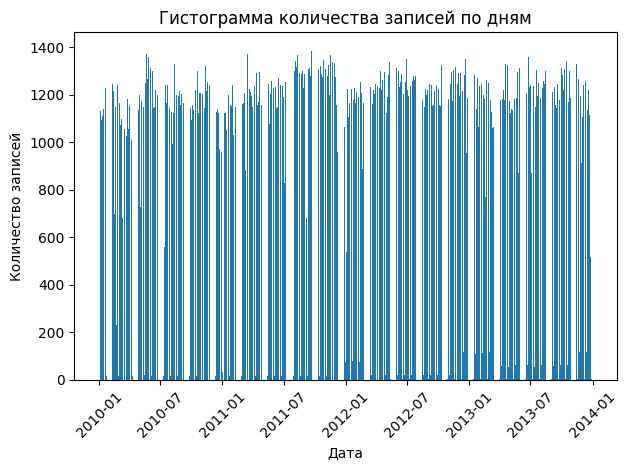

In [47]:
show_plot_number_of_data_per_date(special_data)

In [48]:
special_data.head()

,Ticker,Per,Date,Open,High,Low,Close,Vol,new_index,new_date
0,NQ-100-FUT,1,2010-01-01 00:01:40,186025.0,186500.0,185950.0,186500.0,3263,1.262304e+09,2010-01-01 00:01:40
1,NQ-100-FUT,1,2010-01-01 00:03:20,186500.0,186500.0,186375.0,186450.0,2080,1.262304e+09,2010-01-01 00:02:40
2,NQ-100-FUT,1,2010-01-01 00:05:00,186425.0,186500.0,186400.0,186425.0,1336,1.262304e+09,2010-01-01 00:03:40
3,NQ-100-FUT,1,2010-01-01 00:06:40,186425.0,186450.0,186325.0,186425.0,1109,1.262304e+09,2010-01-01 00:04:40
4,NQ-100-FUT,1,2010-01-01 00:08:20,186450.0,186450.0,186425.0,186425.0,136,1.262304e+09,2010-01-01 00:05:40


In [49]:
# Получение часов из даты
special_data['hour']  = special_data['Date'].dt.hour

# Группировка по часам и выбор последней минуты в каждой группе
result = special_data.groupby('hour').apply(lambda x: x[x['Date'] == x['Date'].max()])

# Удаление временной колонки
result.drop(columns = ['hour'], inplace = True)
special_data.drop(columns = ['hour'], inplace = True)
print(result)

                  Ticker  Per                Date    Open    High     Low  \
hour                                                                        
0    1239474  NQ-100-FUT    1 2013-12-31 00:58:20  3568.0  3568.0  3567.0   
1    1239674  NQ-100-FUT    1 2013-12-31 01:56:40  3566.0  3566.0  3566.0   
2    1239506  NQ-100-FUT    1 2013-12-31 02:58:20  3566.0  3567.0  3566.0   
     1239924  NQ-100-FUT    1 2013-12-31 02:58:20  3576.0  3576.0  3575.0   
3    1239524  NQ-100-FUT    1 2013-12-31 03:58:20  3567.0  3568.0  3567.0   
4    1239956  NQ-100-FUT    1 2013-12-31 04:58:20  3576.0  3576.0  3575.0   
5    1239549  NQ-100-FUT    1 2013-12-31 05:58:20  3567.0  3567.0  3567.0   
     1239992  NQ-100-FUT    1 2013-12-31 05:58:20  3580.0  3580.0  3579.0   
6    1239692  NQ-100-FUT    1 2013-12-31 06:45:00  3567.0  3567.0  3567.0   
7    1240024  NQ-100-FUT    1 2013-12-31 07:58:20  3588.0  3588.0  3587.0   
8    1240060  NQ-100-FUT    1 2013-12-31 08:58:20  3583.0  3583.0  3583.0   

C:\Users\Skiv2\AppData\Local\Temp\ipykernel_33436\2758553144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_data['hour']  = special_data['Date'].dt.hour
C:\Users\Skiv2\AppData\Local\Temp\ipykernel_33436\2758553144.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_data.drop(columns = ['hour'], inplace = True)


In [50]:
# Функция для фильтрации последней минуты в часе
def filter_last_minute_in_hour(group):
    return group[group['Date'] == group['Date'].max()]

def minute_to_hours_transfer(df):
    df.set_index('Date', inplace = True)
    return df.groupby(pd.Grouper(freq='H')).last()

def minute_to_day_transfer(df):
    return df.groupby(df['Date'].dt.date).apply(lambda x: x.nlargest(1, columns='Date'))

# Вычисление последней минуты последнего дня в неделе
def last_minute_of_last_weekday(group):
    return group[group.dt.weekday == group.dt.weekday.max()].tail(1)

def minute_to_weeks_transfer(df):
    df.set_index('Date', inplace = True)
    return df.groupby(df.index.to_period('W')).last()

In [51]:
special_data = special_data.drop(columns=['new_index', 'new_date'])
a = special_data.copy(deep = True)
b = special_data.copy(deep = True)
c = special_data.copy(deep = True)

In [52]:
d = minute_to_hours_transfer(a)
e = minute_to_day_transfer(b)
e = e.droplevel(level=1)
f = minute_to_weeks_transfer(c)
f.reset_index(inplace = True)
f['Period_start'] = f['Date'].astype('datetime64[ns]')
f['Period_end'] = f['Period_start'] + pd.DateOffset(days = 6)
f.set_index('Period_end', inplace = True)

In [53]:
a.head(40)

,Ticker,Per,Open,High,Low,Close,Vol
Date,,,,,,,
2010-01-01 00:01:40,NQ-100-FUT,1,186025.0,186500.0,185950.0,186500.0,3263
2010-01-01 00:03:20,NQ-100-FUT,1,186500.0,186500.0,186375.0,186450.0,2080
2010-01-01 00:05:00,NQ-100-FUT,1,186425.0,186500.0,186400.0,186425.0,1336
2010-01-01 00:06:40,NQ-100-FUT,1,186425.0,186450.0,186325.0,186425.0,1109
2010-01-01 00:08:20,NQ-100-FUT,1,186450.0,186450.0,186425.0,186425.0,136
2010-01-01 00:10:00,NQ-100-FUT,1,186450.0,186450.0,186425.0,186450.0,181
2010-01-01 00:11:40,NQ-100-FUT,1,186425.0,186450.0,186375.0,186425.0,778
2010-01-01 00:13:20,NQ-100-FUT,1,186400.0,186450.0,186400.0,186425.0,429
2010-01-01 00:15:00,NQ-100-FUT,1,186450.0,186450.0,186425.0,186425.0,69


In [54]:
d

,Ticker,Per,Open,High,Low,Close,Vol
Date,,,,,,,
2010-01-01 00:00:00,NQ-100-FUT,1.0,185875.0,185875.0,185875.0,185875.0,0.0
2010-01-01 01:00:00,None,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,None,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 03:00:00,None,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 04:00:00,None,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2013-12-31 19:00:00,NQ-100-FUT,1.0,3565.0,3566.0,3565.0,3566.0,0.0
2013-12-31 20:00:00,NQ-100-FUT,1.0,3568.0,3568.0,3568.0,3568.0,0.0
2013-12-31 21:00:00,NQ-100-FUT,1.0,3571.0,3571.0,3571.0,3571.0,0.0


In [55]:
e.head(10)

,Ticker,Per,Date,Open,High,Low,Close,Vol
Date,,,,,,,,
2010-01-01,NQ-100-FUT,1,2010-01-01 00:40:00,185875.0,185875.0,185875.0,185875.0,0
2010-01-04,NQ-100-FUT,1,2010-01-04 23:58:20,188200.0,188200.0,188150.0,188150.0,218
2010-01-05,NQ-100-FUT,1,2010-01-05 23:58:20,188425.0,188425.0,188400.0,188425.0,28
2010-01-06,NQ-100-FUT,1,2010-01-06 23:58:20,188475.0,188475.0,188425.0,188475.0,98
2010-01-07,NQ-100-FUT,1,2010-01-07 23:58:20,187775.0,187775.0,187750.0,187775.0,40
2010-01-08,NQ-100-FUT,1,2010-01-08 23:58:20,186925.0,186950.0,186925.0,186950.0,33
2010-01-09,NQ-100-FUT,1,2010-01-09 00:36:40,189000.0,189000.0,189000.0,189000.0,0
2010-01-11,NQ-100-FUT,1,2010-01-11 23:58:20,189325.0,189350.0,189300.0,189325.0,334
2010-01-12,NQ-100-FUT,1,2010-01-12 23:58:20,187225.0,187250.0,187225.0,187225.0,64


In [56]:
f

,Date,Ticker,Per,Open,High,Low,Close,Vol,Period_start
Period_end,,,,,,,,,
2010-01-03,2009-12-28/2010-01-03,NQ-100-FUT,1,185875.0,185875.0,185875.0,185875.0,0,2009-12-28
2010-01-10,2010-01-04/2010-01-10,NQ-100-FUT,1,189000.0,189000.0,189000.0,189000.0,0,2010-01-04
2010-01-17,2010-01-11/2010-01-17,NQ-100-FUT,1,186225.0,186225.0,186225.0,186225.0,0,2010-01-11
2010-01-24,2010-01-18/2010-01-24,NQ-100-FUT,1,179775.0,179775.0,179775.0,179775.0,0,2010-01-18
2010-01-31,2010-01-25/2010-01-31,NQ-100-FUT,1,173925.0,173925.0,173925.0,173925.0,0,2010-01-25
...,...,...,...,...,...,...,...,...,...
2013-12-08,2013-12-02/2013-12-08,NQ-100-FUT,1,3506.0,3506.0,3506.0,3506.0,0,2013-12-02
2013-12-15,2013-12-09/2013-12-15,NQ-100-FUT,1,3453.0,3453.0,3453.0,3453.0,0,2013-12-09
2013-12-22,2013-12-16/2013-12-22,NQ-100-FUT,1,3537.0,3537.0,3537.0,3537.0,0,2013-12-16


In [62]:
def divide_by_100(number):
    if number > 10000:
        return number / 100
    else:
        return number

In [64]:
d.Open = d.Open.apply(divide_by_100)
d.High = d.High.apply(divide_by_100)
d.Low = d.Low.apply(divide_by_100)
d.Close = d.Close.apply(divide_by_100)
d.to_csv("nasdaq_MinuteToHour.csv")

In [65]:
e.Open = e.Open.apply(divide_by_100)
e.High = e.High.apply(divide_by_100)
e.Low = e.Low.apply(divide_by_100)
e.Close = e.Close.apply(divide_by_100)
e.to_csv("nasdaq_MinuteToDay.csv")

In [66]:
f.Open = f.Open.apply(divide_by_100)
f.High = f.High.apply(divide_by_100)
f.Low = f.Low.apply(divide_by_100)
f.Close = f.Close.apply(divide_by_100)
f.to_csv("nasdaq_MinuteToWeek.csv")

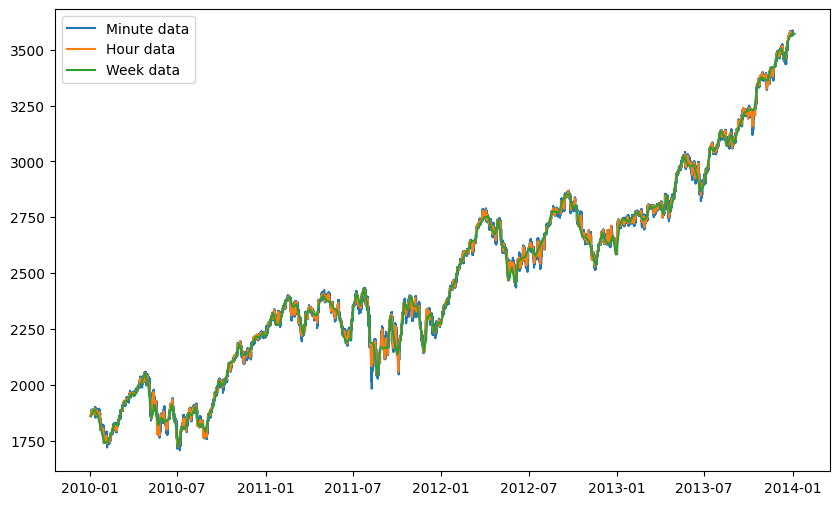

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(d.Close, label = "Minute data")
plt.plot(e.Close, label = "Hour data")
plt.plot(f.Close, label = "Week data")
plt.legend()